In [1]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from scipy.io import arff




<h2>Importer les données</h2>

In [2]:

# importer les données
train_df = pd.DataFrame(arff.loadarff('KDDTrain+.arff')[0])
test_df = pd.DataFrame(arff.loadarff('KDDTest+.arff')[0])

### Decoder byte strings en ordinary strings: pour éviter les b'' sur les valeurs de chaines de caractères
print('Decoding byte strings into ordinary strings. (for train data)')
strings = train_df.select_dtypes([object])
strings = strings.stack().str.decode('utf-8').unstack()
for column in strings:
    train_df[column] = strings[column]
    
print('Decoding byte strings into ordinary strings. (for test data)')
strings = test_df.select_dtypes([object])
strings = strings.stack().str.decode('utf-8').unstack()
for column in strings:
    test_df[column] = strings[column]


Decoding byte strings into ordinary strings. (for train data)
Decoding byte strings into ordinary strings. (for test data)


In [6]:
test_df.shape

(22544, 42)

In [4]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,private,REJ,0.0,0.0,0,0.0,0.0,0.0,...,10.0,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0.0,tcp,private,REJ,0.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2.0,tcp,ftp_data,SF,12983.0,0.0,0,0.0,0.0,0.0,...,86.0,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0.0,icmp,eco_i,SF,20.0,0.0,0,0.0,0.0,0.0,...,57.0,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1.0,tcp,telnet,RSTO,0.0,15.0,0,0.0,0.0,0.0,...,86.0,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [30]:
test_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

<h2> 3.2 Data processing </h2>

In [31]:
train_df.shape

(125973, 42)

In [32]:
train_df.select_dtypes([object])


,protocol_type,service,flag,land,logged_in,is_host_login,is_guest_login,class
0,tcp,ftp_data,SF,0,0,0,0,normal
1,udp,other,SF,0,0,0,0,normal
2,tcp,private,S0,0,0,0,0,anomaly
3,tcp,http,SF,0,1,0,0,normal
4,tcp,http,SF,0,1,0,0,normal
...,...,...,...,...,...,...,...,...
125968,tcp,private,S0,0,0,0,0,anomaly
125969,udp,private,SF,0,0,0,0,normal
125970,tcp,smtp,SF,0,1,0,0,normal
125971,tcp,klogin,S0,0,0,0,0,anomaly


<h3>Convertir les valeurs chaines de caractère en numeric </h3>

In [7]:
#convertier les chaine en numeric
train_df["land"] = pd.to_numeric(train_df["land"])
train_df["logged_in"] = pd.to_numeric(train_df["logged_in"])
train_df["is_host_login"] = pd.to_numeric(train_df["is_host_login"])
train_df["is_guest_login"] = pd.to_numeric(train_df["is_guest_login"])

test_df["land"] = pd.to_numeric(test_df["land"])
test_df["logged_in"] = pd.to_numeric(test_df["logged_in"])
test_df["is_host_login"] = pd.to_numeric(test_df["is_host_login"])
test_df["is_guest_login"] = pd.to_numeric(test_df["is_guest_login"])

train_df.select_dtypes([object])


,protocol_type,service,flag,class
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,anomaly
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
125968,tcp,private,S0,anomaly
125969,udp,private,SF,normal
125970,tcp,smtp,SF,normal
125971,tcp,klogin,S0,anomaly


<h3> Encoder les features categorical </h3>

In [8]:
train_df=train_df.drop("flag",axis=1)
train_df=train_df.drop("service",axis=1)

In [9]:
test_df=test_df.drop("flag",axis=1)
test_df=test_df.drop("service",axis=1)

In [10]:
test_df["protocol_type"].unique()

array(['tcp', 'icmp', 'udp'], dtype=object)

supprimer les lignes qui ont un protocol différent de tcp ( tcp est le protocol le plus important)

In [11]:
train_df = train_df.drop(train_df[train_df.protocol_type != 'tcp'].index)

In [12]:
train_df['protocol_type'].unique()

array(['tcp'], dtype=object)

In [39]:
train_df.shape

(102689, 40)

In [40]:
train_df.columns

Index(['duration', 'protocol_type', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_root',
       'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

Supprimer les features que le router n'est pas sensé atteindre

In [13]:
##Train data
train_df=train_df.drop("dst_host_srv_rerror_rate",axis=1)
train_df=train_df.drop("dst_host_rerror_rate",axis=1)
train_df=train_df.drop("dst_host_srv_serror_rate",axis=1)
train_df=train_df.drop("dst_host_serror_rate",axis=1)
train_df=train_df.drop("dst_host_srv_diff_host_rate",axis=1)
train_df=train_df.drop("dst_host_same_src_port_rate",axis=1)
train_df=train_df.drop("dst_host_diff_srv_rate",axis=1)
train_df=train_df.drop("dst_host_same_srv_rate",axis=1)
train_df=train_df.drop("dst_host_srv_count",axis=1)
train_df=train_df.drop("dst_host_count",axis=1)
train_df=train_df.drop("srv_diff_host_rate",axis=1)
train_df=train_df.drop("diff_srv_rate",axis=1)
train_df=train_df.drop("same_srv_rate",axis=1)
train_df=train_df.drop("srv_rerror_rate",axis=1)
train_df=train_df.drop("srv_count",axis=1)
train_df=train_df.drop("srv_serror_rate",axis=1)

## Test data
test_df=test_df.drop("dst_host_srv_rerror_rate",axis=1)
test_df=test_df.drop("dst_host_rerror_rate",axis=1)
test_df=test_df.drop("dst_host_srv_serror_rate",axis=1)
test_df=test_df.drop("dst_host_serror_rate",axis=1)
test_df=test_df.drop("dst_host_srv_diff_host_rate",axis=1)
test_df=test_df.drop("dst_host_same_src_port_rate",axis=1)
test_df=test_df.drop("dst_host_diff_srv_rate",axis=1)
test_df=test_df.drop("dst_host_same_srv_rate",axis=1)
test_df=test_df.drop("dst_host_srv_count",axis=1)
test_df=test_df.drop("dst_host_count",axis=1)
test_df=test_df.drop("srv_diff_host_rate",axis=1)
test_df=test_df.drop("diff_srv_rate",axis=1)
test_df=test_df.drop("same_srv_rate",axis=1)
test_df=test_df.drop("srv_rerror_rate",axis=1)
test_df=test_df.drop("srv_count",axis=1)
test_df=test_df.drop("srv_serror_rate",axis=1)

In [42]:
train_df.shape

(102689, 24)

In [14]:
train_df.duplicated().sum()

53079

In [46]:
test_df.duplicated().sum()

10239

In [44]:
print (' The train dataset include '+str(train_df[train_df['class']=="normal"].shape[0]) +' of normal ')
print (' The train dataset include '+str(train_df[train_df['class']=="anomaly"].shape[0]) +' of attacks ')

 The train dataset include 53600 of normal 
 The train dataset include 49089 of attacks 


In [433]:
print (' The test dataset include '+str(test_df[test_df['class']=="normal"].shape[0]) +' of normal ')
print (' The test dataset include '+str(test_df[test_df['class']=="anomaly"].shape[0]) +' of attacks ')

 The test dataset include 9711 of normal 
 The test dataset include 12833 of attacks 


In [434]:
train_df.nunique()

duration              1796
protocol_type            1
src_bytes             3326
dst_bytes             9282
land                     2
wrong_fragment           1
urgent                   4
hot                     28
num_failed_logins        6
logged_in                2
num_compromised         88
root_shell               2
su_attempted             3
num_root                82
num_file_creations      35
num_shells               3
num_access_files        10
num_outbound_cmds        1
is_host_login            2
is_guest_login           2
count                  512
serror_rate             81
rerror_rate             82
class                    2
dtype: int64

<h3>Supprimer les colonnes qui n'ont pas de valeurs ajoutée </h3>

protocol_type, wrong_fragment,num_outbound_cmds n'ont qu'un seule valeur, on peut donc éliminer les colonnes vu qu'elles n'apportent pas de distinction 

In [15]:
#for train data
train_df=train_df.drop("protocol_type",axis=1)
train_df=train_df.drop("wrong_fragment",axis=1)
train_df=train_df.drop("num_outbound_cmds",axis=1)


#for test data
test_df=test_df.drop("protocol_type",axis=1)
test_df=test_df.drop("wrong_fragment",axis=1)
test_df=test_df.drop("num_outbound_cmds",axis=1)

<h3> Encoder la target  </h3>

In [16]:
train_df['class']

0          normal
2         anomaly
3          normal
4          normal
5         anomaly
           ...   
125967     normal
125968    anomaly
125970     normal
125971    anomaly
125972     normal
Name: class, Length: 102689, dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

train_df_enc=train_df
test_df_enc=test_df

train_df_enc['class'] = labelencoder.fit_transform(train_df['class'])
test_df_enc['class'] = labelencoder.fit_transform(test_df['class'])

<h3>Supprimer les doublons </h3>

In [18]:
train_df_enc.duplicated().sum()

53079

a voir si on supprime les doublons, il y en a trop

In [19]:
train_df_enc=train_df_enc.drop_duplicates(keep='first')
train_df_enc.shape


(49610, 21)

In [20]:
train_df_enc.duplicated().sum()

0

<h2>Normalization</h2>

In [452]:
test_df_enc.shape

(22544, 41)

In [21]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df_std=scaler.fit_transform(train_df_enc)
test_df_std = scaler.fit_transform(test_df_enc)
train_df_std


array([[0.00000000e+00, 3.55806412e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.68120341e-07, 6.22396154e-06, ...,
        2.00000000e-01, 0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 1.61815829e-06, 2.78639269e-07, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 2.60151735e-07, 2.86273222e-07, ...,
        3.30000000e-01, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.61670897e-06, 2.93143779e-07, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [22]:
features= train_df_enc.columns
features.shape

train_df_std_df = pd.DataFrame(train_df_std,columns = features ) 
test_df_std_df = pd.DataFrame(test_df_std,columns = features ) 
train_df_std_df


,duration,src_bytes,dst_bytes,land,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,serror_rate,rerror_rate,class
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.00,0.0,1.0
1,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.240705,1.00,0.0,0.0
2,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.009785,0.20,0.0,1.0
3,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.058708,0.00,0.0,1.0
4,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.236791,0.00,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49605,0.0,2.384120e-07,6.756048e-07,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.027397,0.00,0.0,1.0
49606,0.0,2.420353e-07,1.221432e-06,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.005871,0.00,0.0,1.0
49607,0.0,1.618158e-06,2.786393e-07,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.00,0.0,1.0
49608,0.0,2.601517e-07,2.862732e-07,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.005871,0.33,0.0,1.0


<h1> Split X et Y  </h1>

In [23]:

train_df_enc_x = train_df_std_df.drop(['class'], axis=1)

test_df_enc_x = test_df_std_df.drop(['class'], axis=1)


<b> Dans l'apprentissage non supervisé la colonne target est inutilisable, le model classifie par groupe et donnera un nom a chaque groupe ( 0, 1,2..) </b>

<h1> PCA </h1>

<h2>afficher la corrélation avant l'application du PCA</h2>

<Axes: >

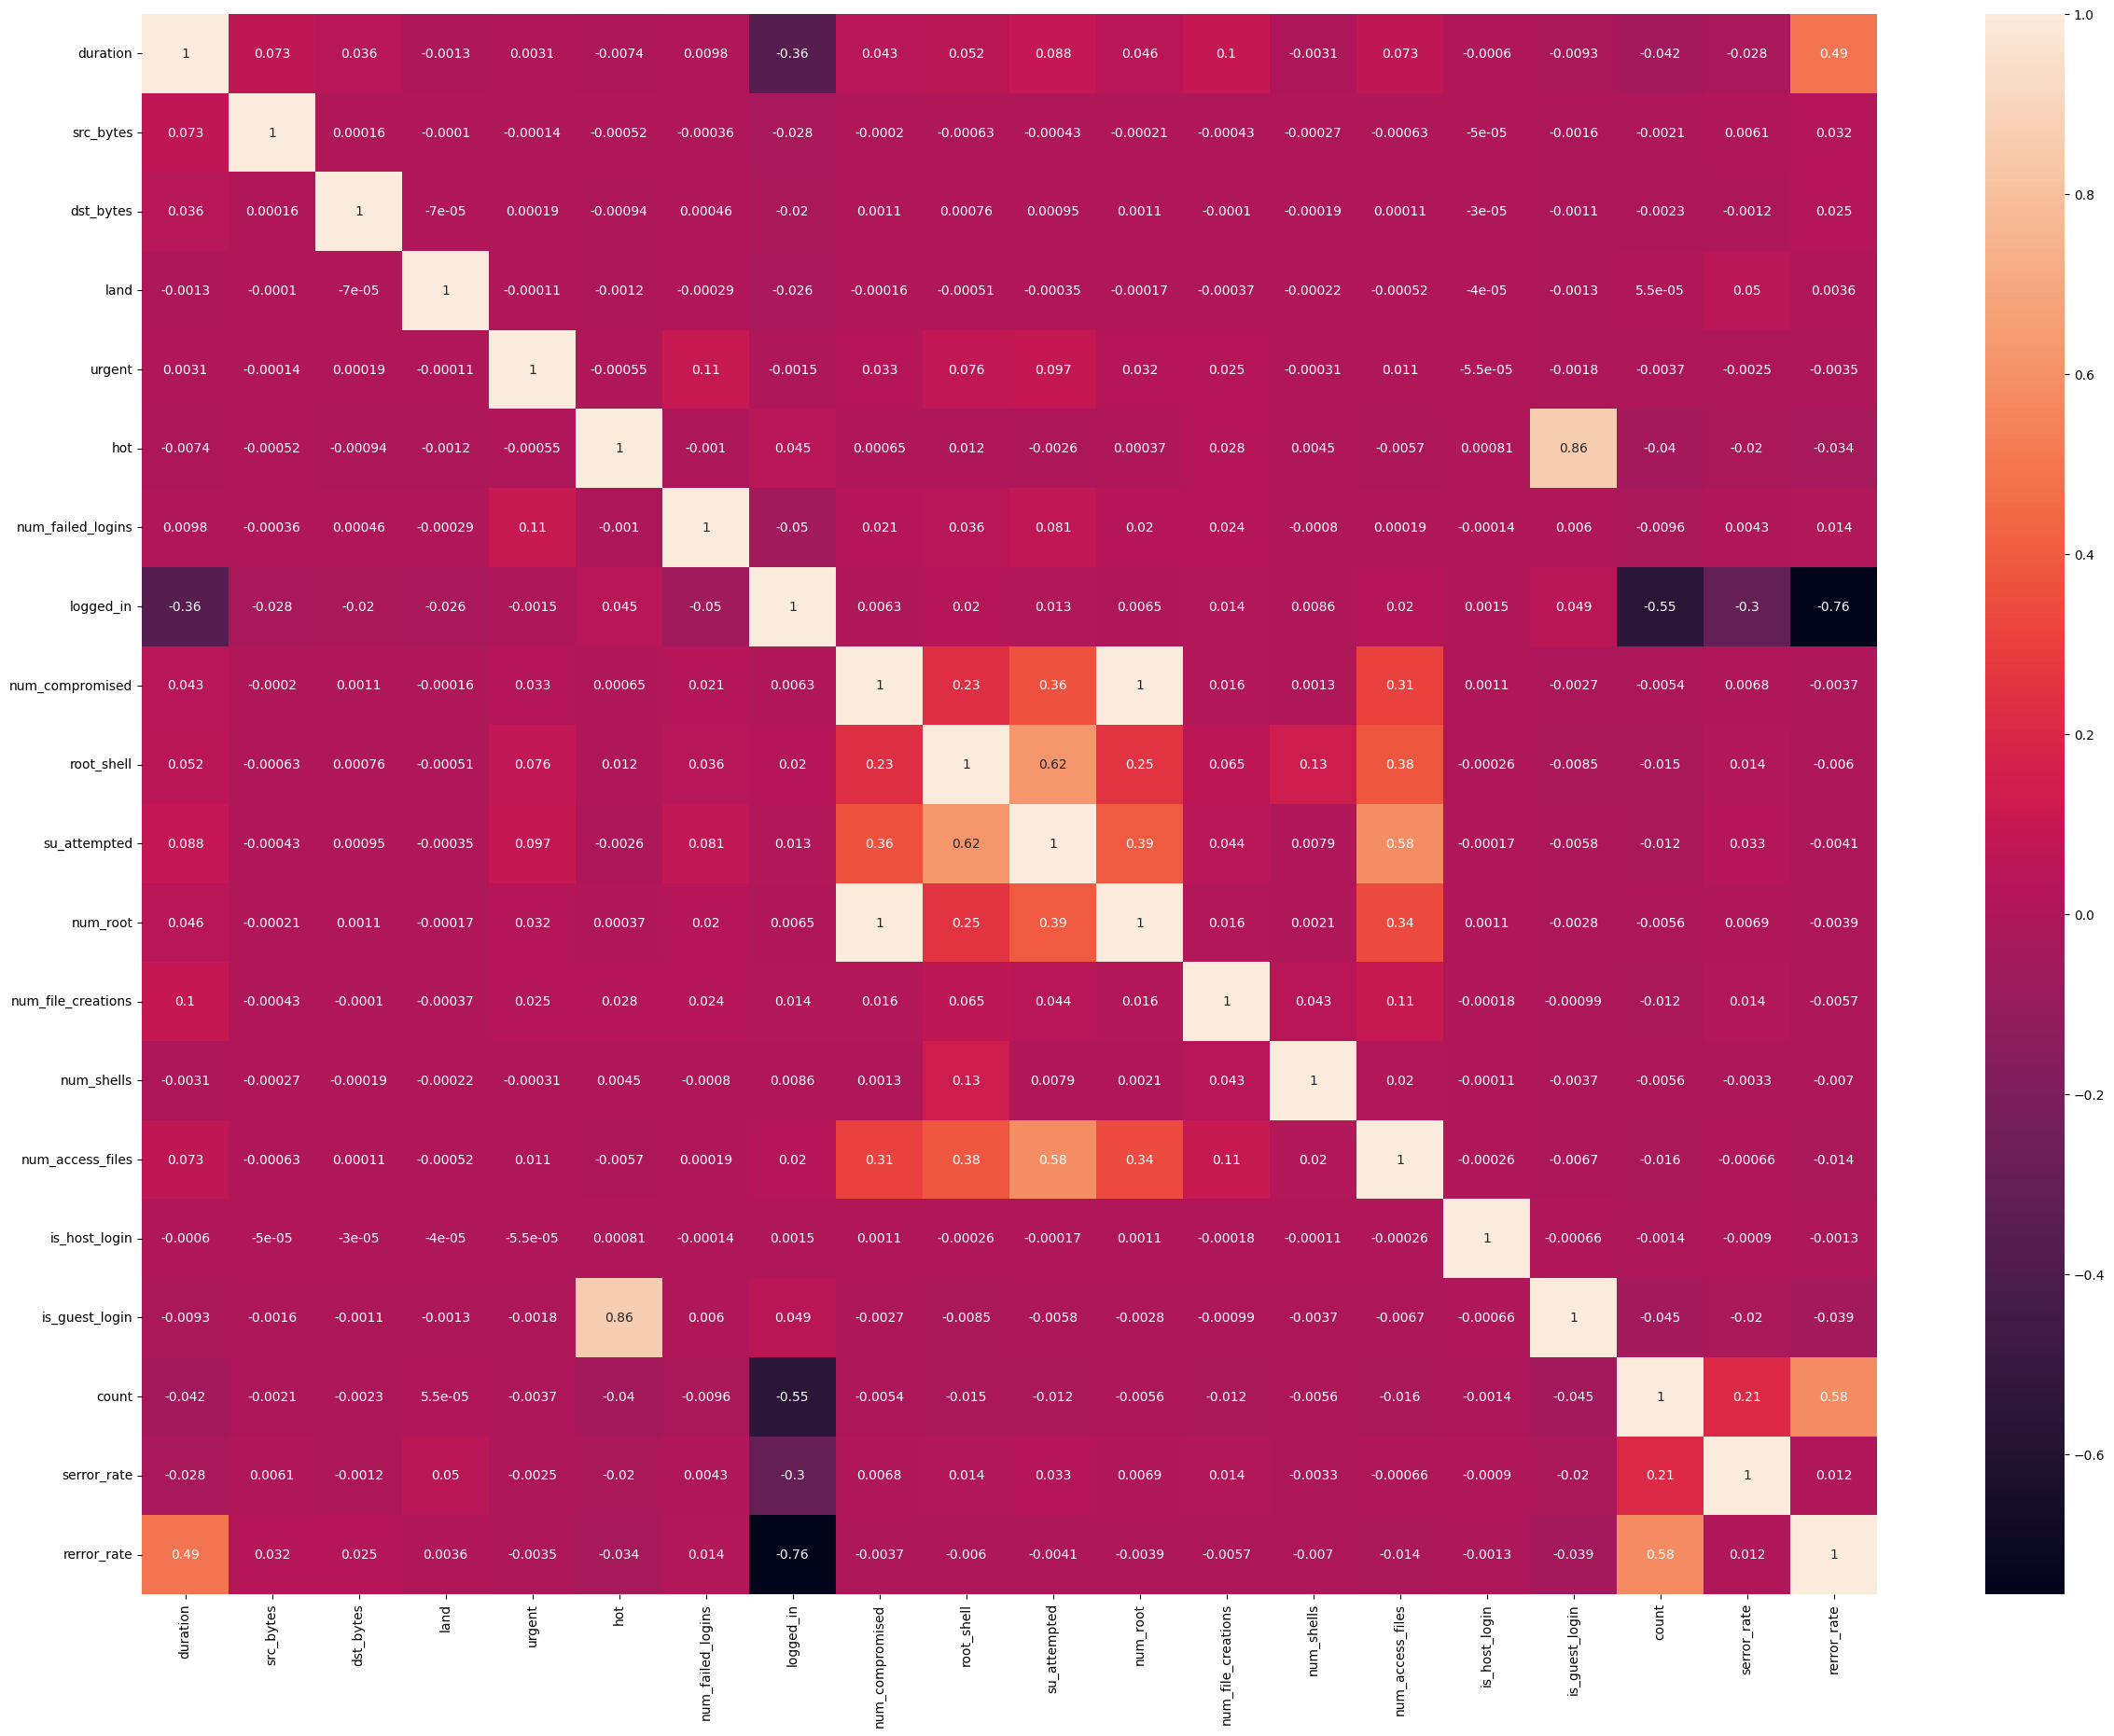

In [24]:
plt.figure(figsize=(30,22))
plt.rcParams['font.size']=10
sns.heatmap(train_df_enc_x.corr(), annot=True)

<h2>Choisir le nombre optimal de composants principal </h2>

Nombre de composantes calculées :  20


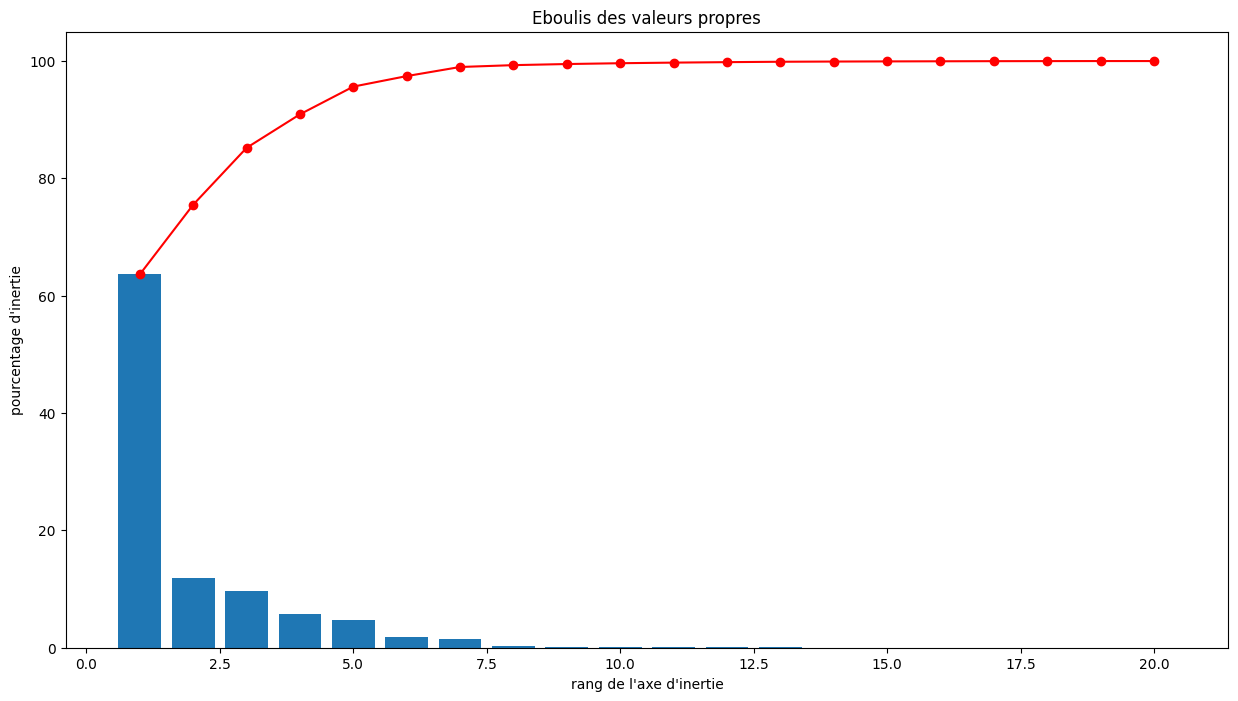

PCA(n_components=20)

In [28]:
from sklearn.decomposition import PCA

# fonction pour afficher les composantes principales
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)


n_comp = 20

# Calcul des composantes principales
pca = PCA(20)
pca.fit(train_df_enc_x)
print('Nombre de composantes calculées : ', pca.n_components_)

# Eboulis des valeurs propres
plt.figure( figsize = ( 15, 8)) 
display_scree_plot(pca)
pca

<Axes: xlabel='PC1', ylabel='PC2'>

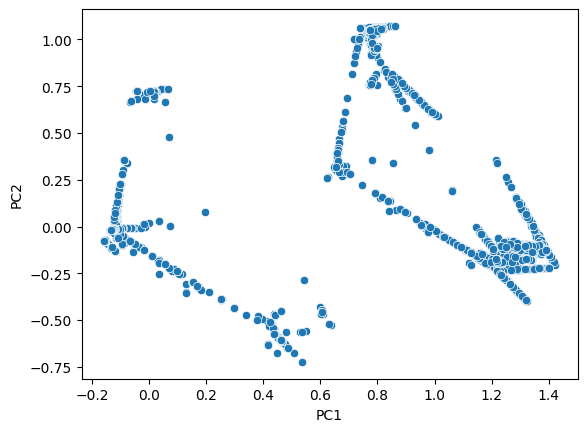

In [31]:
#appliquer le PCA pour avoir 2 composants (n_components=2) 
# du moment que 2 composants nous permettent d'avoir 100% de l'information
pca = PCA(n_components=3).fit(train_df_enc_x)
train_df_enc_x_pca = pca.transform(train_df_enc_x)
test_df_enc_x_pca = pca.transform(test_df_enc_x)

# Créer un DataFrame à partir des données PCA
train_df_enc_x_pca_df = pd.DataFrame(train_df_enc_x_pca, columns=['PC1', 'PC2', 'PC3'])

# dessiner les projections de train_normalized_pca sur les deux composantes qu'on a trouvé en utlisant PCA
sns.scatterplot(data=train_df_enc_x_pca_df, x='PC1', y='PC2', alpha=1)


In [32]:
features_pca=['PC'+str(i+1) for i in range(pca.n_components_)]
train_x_pca = pd.DataFrame(train_df_enc_x_pca,columns=features_pca)
train_x_pca
test_x_pca = pd.DataFrame(test_df_enc_x_pca,columns=features_pca)
test_x_pca

,PC1,PC2,PC3
0,1.312109,-0.228378,-0.011397
1,1.274262,-0.232267,-0.008184
2,0.646831,0.317610,0.015833
3,0.646827,0.317616,0.015833
4,1.219325,-0.237916,-0.003520
...,...,...,...
22539,-0.133743,-0.016394,-0.025888
22540,-0.133336,-0.016352,-0.025923
22541,-0.132224,-0.016520,-0.021251
22542,0.648048,0.317741,0.015730


<h2>afficher la corrélation après l'application du PCA</h2>

<Axes: >

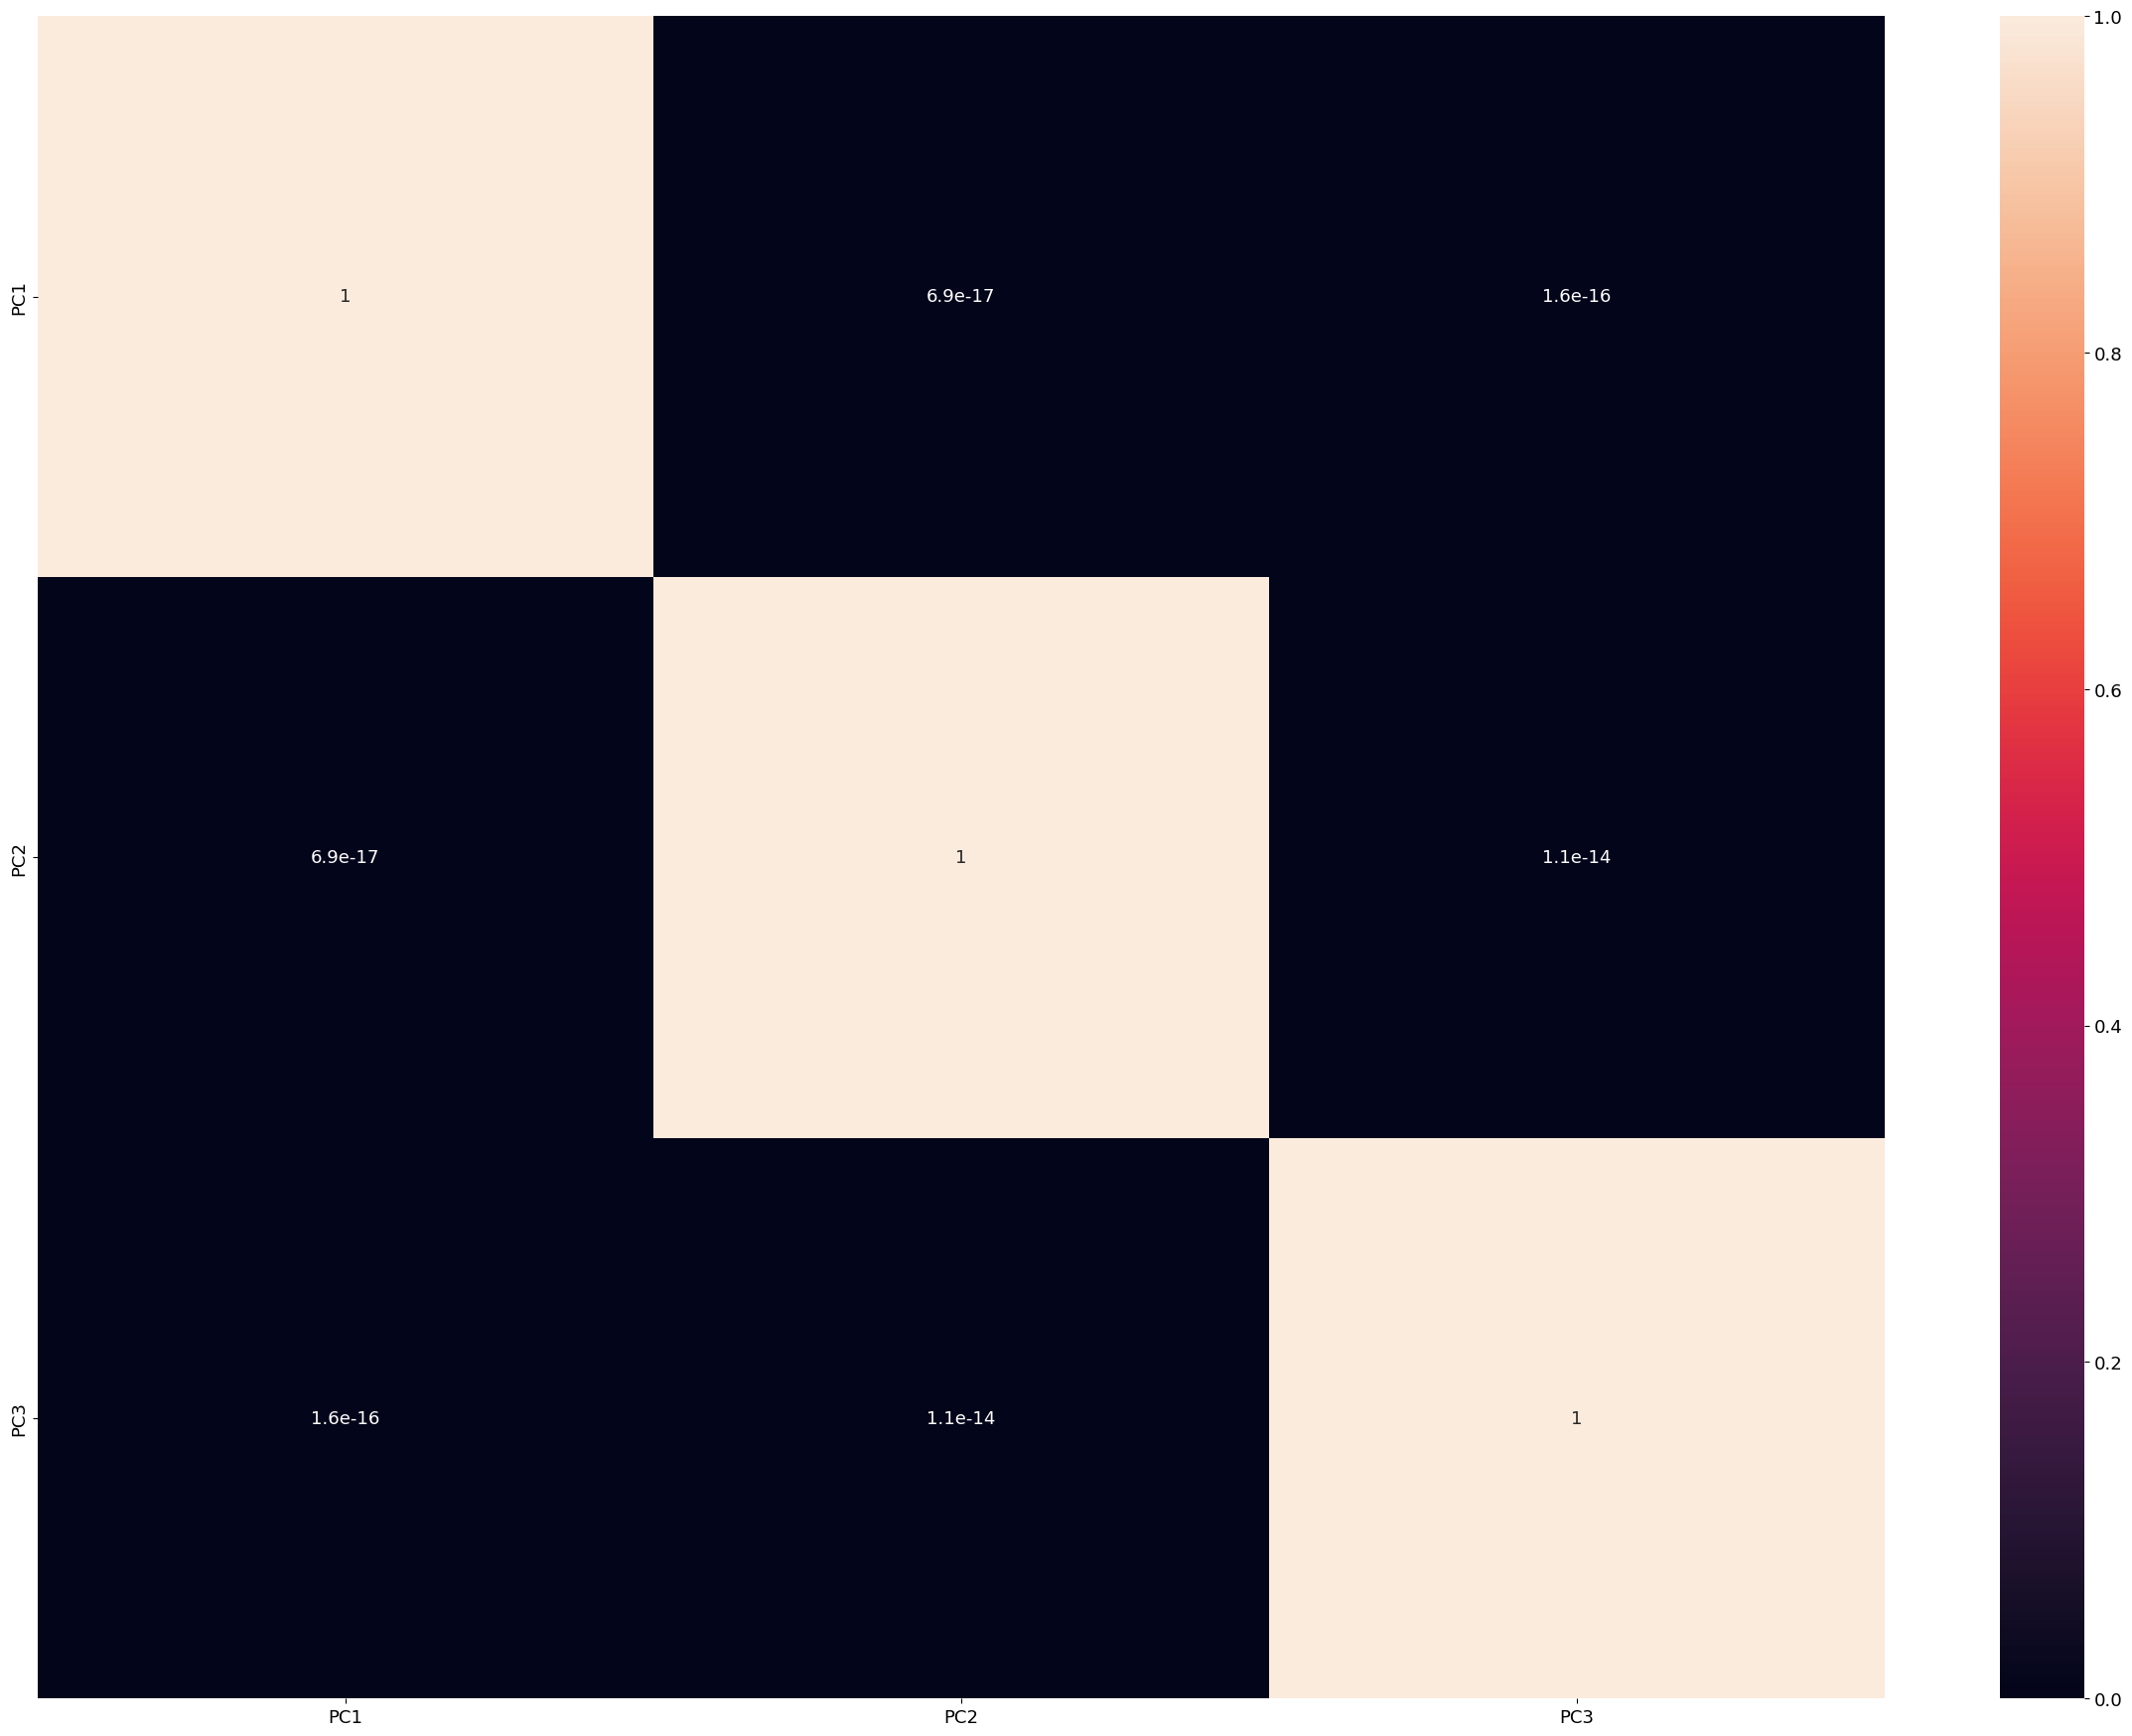

In [463]:
plt.figure(figsize=(30,22))
plt.rcParams['font.size']=13
sns.heatmap(train_x_pca.corr(), annot=True)


On voit ici que la correlation est minime entre les differentes features, donc le PCA a bien éliminé la correlation entre les features

<h1> Exemple 1 : GMM </h1>

In [35]:

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
y_gmm=gmm.fit_predict(train_x_pca)


# Calculate the likelihood scores for each data point
#likelihoods = -gmm.score_samples(train_x_pca)


In [36]:
y_gmm[:10]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [37]:
train_x_pca2=train_x_pca

In [38]:
score = gmm.score_samples(train_x_pca2)
train_x_pca2['score']=score

In [39]:
train_x_pca2

,PC1,PC2,PC3,score
0,0.647234,0.317657,0.015799,1.451974
1,0.788411,1.064526,0.057516,-1.507010
2,-0.113728,0.132135,-0.016847,0.129739
3,-0.121941,-0.015181,-0.026890,7.354688
4,1.268158,-0.232895,-0.007666,1.206977
...,...,...,...,...
49605,-0.128452,-0.015850,-0.026337,7.661860
49606,-0.132929,-0.016310,-0.025957,7.664615
49607,-0.133743,-0.016393,-0.025888,7.646869
49608,-0.102590,0.228487,-0.010811,0.318038


In [40]:
# Set a threshold for anomaly detection (e.g., using a percentile)
threshold = np.percentile(likelihoods, 75)  # Adjust the percentile as needed

NameError: name 'likelihoods' is not defined

In [ ]:
threshold

In [42]:
likelihoods

In [ ]:
anomalies_indices = np.where(likelihoods < threshold)[0]

In [ ]:
anomalies_indices.shape

In [ ]:
train_x_pca.shape

In [ ]:
qsd,

<h2>Gaussian Mixture Probability Model</h2>

<h3> Gaussian Mixture Probability Model¶ </h3>

n_components: The number of mixture components. (default 1)
contamination: percentage of outliers (nomalies in our case) (default 10%)


In [ ]:
from pyod.models.gmm import GMM
gmm = GMM(n_components=3) 
gmm.fit(train_x_pca)


decision_function permet de generer les scores des outilers (anomalies)

In [ ]:
# Training data
y_train_scores = gmm.decision_function(train_x_pca)
y_train_pred = gmm.predict(train_x_pca)

In [ ]:
y_train_scores.shape

In [ ]:
train_x_pca.shape

In [ ]:
y_train_pred

In [ ]:
# Test data
y_test_scores = gmm.decision_function(test_x_pca)
y_test_pred = gmm.predict(test_x_pca) # outlier labels (0 or 1)

In [ ]:
def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
print("The test data:", count_stat(y_test_pred))
# Threshold for the defined comtanimation rate
print("The threshold for the defined comtanimation rate:" , gmm.threshold_)


In [ ]:
gmm.get_params()

En général on ne connait pas le pourcentage des anomalies, on peut utiliser l'histogramme des anomalies score pour selectionner un threshold 

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto')  
plt.title("Histogram with 'auto' bins")
plt.xlabel('GMM outlier score')
plt.show()

on peut considerer un treshold a 8, paarce qu'il ya une coupure claire das l'histogramme.

In [ ]:
gmm.threshold_ =8


In [ ]:
threshold = gmm.threshold_ # on prend la valeur par default du treshold (on aurait pu considérer la valeur 8)

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(train_x_pca,y_train_scores, threshold)


The above table presents the characteristics of the normal and abnormal groups. It shows the count and count percentage of the normal and outlier groups. The “Anomalous_Score” is the average anomaly score. You are reminded to label the features with their feature names for an effective presentation. The table tells us several important results:

The size of the outlier group: The outlier group is about 5%. Remember the size of the outlier group is determined by the threshold. If you choose a higher value for the threshold, the size will shrink.
The average anomaly score: The average outlier score of the outlier group is far higher than that of the normal group (9.12>-0.34). You do not need to interpret too much on the scores.
The feature statistics in each group: The above shows the means of the features in the outlier group are smaller than those of the normal group. Whether the means of the features in the outlier group should be higher or lower depends on business applications. It is important that all the means should be consistent with the domain knowledge.

In [ ]:
test_df_enc_y.shape

In [ ]:
Actual_pred = pd.DataFrame({'Actual': test_df_enc_y, 'Anomaly_Score': y_test_scores})
Actual_pred['Pred'] = np.where(Actual_pred['Anomaly_Score']< threshold,0,1)
pd.crosstab(Actual_pred['Actual'],Actual_pred['Pred'])

In [ ]:
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
from pyod.models.gmm import GMM

# Standardize data
#X_train_norm, X_test_norm = standardizer(train_x_pca, test_x_pca)
X_train_norm, X_test_norm = train_x_pca, test_x_pca
# Test a range of clusters from 2 to 8. There will be 7 models.
n_clf = 7
k_list = [2, 3, 4, 5, 6, 7, 8]
# Just prepare data frames so we can store the model results
train_scores = np.zeros([train_x_pca.shape[0], n_clf])
test_scores = np.zeros([test_x_pca.shape[0], n_clf])
train_scores.shape
# Modeling
for i in range(n_clf):
    k = k_list[i]
    gmm = GMM(n_components = k) 
    gmm.fit(X_train_norm)

    # Store the results in each column:
    test_scores[:, i] = gmm.decision_function(X_test_norm) 
# Decision scores have to be normalized before combination
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

In [ ]:
# Combination by average
# The test_scores_norm is 500 x 7. The "average" function will take the average of the 7 columns. 
# The result "y_by_average" is a single column: 
y_train_by_average = average(train_scores_norm)
y_test_by_average = average(test_scores_norm)
import matplotlib.pyplot as plt
plt.hist(y_train_by_average, bins='auto') # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()